# Regressão Linear - Machine Learning 04

### Importação

In [1]:
# Libs
import numpy as np
import pandas as pd
import preprocessing as pre

### Base de dados

In [2]:
# Função de carregamento de dados
def carregarDados(arquivo):
    ds = pd.read_csv(arquivo, sep=';')
    # Amostra
    X = ds.iloc[:,:-1].values
    # Variável independente 
    y = ds.iloc[:,-1].values
    return X, y

### Substituído Valores Faltante  

In [3]:
# Função de Substituição dos valores
def valorFaltante(X, inicioColuna, fimColuna):
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(missing_values=np.nan, strategy='median')
    X[:,inicioColuna:fimColuna + 1] = imputer.fit_transform(X[:,inicioColuna:fimColuna + 1])
    return X

### Transformando os valores

In [4]:
# Função de Transformação dos Valores
def transform(X, i):
    from sklearn.preprocessing import LabelEncoder
    labelencoder_X = LabelEncoder()
    X[:, i] = labelencoder_X.fit_transform(X[:, i])

    #one hot encoding
    D = pd.get_dummies(X[:,i]).values
    if(i == 0):
        X = X[:,1:]
        X = np.insert(X, 0, D, axis=1)

        #removendo dummy variable trap
        X = X[:,1:]
    else:
        X = X[:,:i]
        for j in range(0, D.shape[1]):
            X = np.insert(X, i, D[:,j], axis=1)

        #removendo dummy variable trap
        X = X[:,:-1]
    return X

### Dividindo a base de Treino e Teste

In [5]:
# Função de Treino e Teste
def treinoTeste(X, y, testSize):
    from sklearn.model_selection import train_test_split
    XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size = testSize)
    return XTrain, XTest, yTrain, yTest

### Normalizando o Conjunto de Dados

In [6]:
# Função de Normalização de dados
def normalizarDados(train, test):
    from sklearn.preprocessing import StandardScaler
    scaleX = StandardScaler()
    train = scaleX.fit_transform(train)
    test = scaleX.fit_transform(test)
    return train, test

### Regressão Linear

In [7]:
# Função do Algorítimo de Regressão
def regressaoLinear(X_train, X_test, y_train, y_test):
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression

    regressor = LinearRegression()
    regressor.fit(X_train, y_train)
    # yPred = regressor.predict(X_test)
    
    plt.scatter(X_test[:,-1], y_test, color="red")
    plt.plot(X_test[:,-1], regressor.predict(X_test), color="blue")
    plt.title("Inscritos x Visualizações (SVBR)")
    plt.xlabel("Total de Inscritos")
    plt.ylabel("Total de Visualizações")
    plt.show()

### Rodando Todas as Funções

In [8]:
# Função que roda todas as funções
def rodarRegressao(dados):
    X, y = carregarDados(dados)
    X = valorFaltante(X, 1, X.shape[1])
    X = transform(X, 0)
    XTrain, XTest, yTrain, yTest = treinoTeste(X, y, 0.8)
    X = normalizarDados(XTrain, XTest)
    regressaoLinear( XTrain, XTest, yTrain, yTest)

### Resultado Final

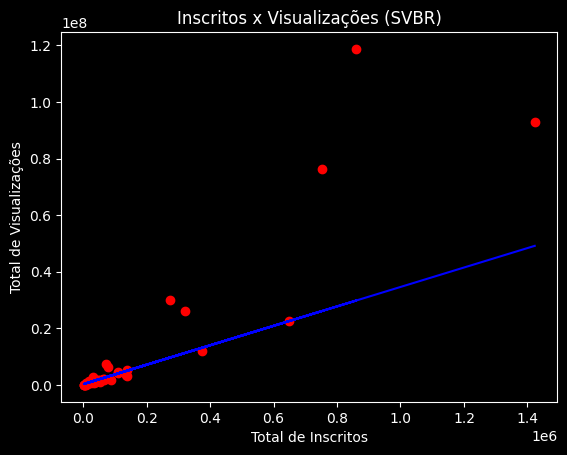

In [9]:
# # Rodando a função 
rodarRegressao('../data/svbr.csv')